# GDP Forecast Project
Bu çalışmada, dünya ülkelerinin kişi başına düşen GSYİH (GDP per capita) verileri incelenmiş ve Singapur özelinde yıllara göre GDP değişimi tahmin edilmiştir.

Amaç:
- Veriyi Kaggle'dan okumak
- Veri keşfi (EDA)
- Görselleştirme
- Basit regresyon modeli ile tahmin
- Modelin Flask web uygulamasına entegrasyonu

In [1]:
#libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:
# Görsel ayarlar
plt.style.use('seaborn-v0_8')
sns.set_palette('crest')
plt.rcParams['figure.figsize'] = (10, 6)

In [30]:
#data load
df = pd.read_csv(r"D:\\python\\flask_simple_todo\\project_new\\data\\GDP.csv", encoding='utf-8')



df.head()

,Country,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [31]:
# Sütun adlarını kontrol edelim
print("Columns:", df.columns.tolist()[:10])
print(df.head(3))

Columns: ['Country ', 'Country_Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997']
      Country  Country_Code          1990          1991          1992  \
0        Aruba          ABW  24101.109430  25870.755940  26533.343900   
1  Afghanistan          AFG           NaN           NaN           NaN   
2       Angola          AGO   3089.683369   3120.356148   2908.160798   

          1993          1994          1995          1996          1997  ...  \
0  27430.75240  28656.520210  28648.990020  28499.089430  30215.949230  ...   
1          NaN           NaN           NaN           NaN           NaN  ...   
2   2190.76816   2195.532289   2496.199493   2794.896906   2953.342709  ...   

           2010          2011          2012          2013          2014  \
0  33732.847450  35492.618490  35498.982090  37419.892820  38223.372260   
1   1637.377987   1626.764793   1806.763930   1874.765634   1897.525938   
2   6230.297028   6346.395122   6772.528333   6980.423038   719

In [32]:
# temizlik
df.columns = df.columns.str.strip()

# yıl sütunlarını otomatik bul
year_cols = [col for col in df.columns if col.isdigit()]
print(f"year columns find: {year_cols[:5]} ... {year_cols[-5:]}")


year columns find: ['1990', '1991', '1992', '1993', '1994'] ... ['2015', '2016', '2017', '2018', '2019']


In [33]:
# veri temizleme için (for data cleaning)
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       260 non-null    object 
 1   Country_Code  260 non-null    object 
 2   1990          209 non-null    float64
 3   1991          211 non-null    float64
 4   1992          213 non-null    float64
 5   1993          215 non-null    float64
 6   1994          218 non-null    float64
 7   1995          224 non-null    float64
 8   1996          224 non-null    float64
 9   1997          225 non-null    float64
 10  1998          226 non-null    float64
 11  1999          227 non-null    float64
 12  2000          236 non-null    float64
 13  2001          237 non-null    float64
 14  2002          238 non-null    float64
 15  2003          238 non-null    float64
 16  2004          238 non-null    float64
 17  2005          238 non-null    float64
 18  2006          238 non-null    

Country           0
Country_Code      0
1990             51
1991             49
1992             47
1993             45
1994             42
1995             36
1996             36
1997             35
1998             34
1999             33
2000             24
2001             23
2002             22
2003             22
2004             22
2005             22
2006             22
2007             21
2008             20
2009             19
2010             19
2011             17
2012             19
2013             19
2014             20
2015             22
2016             22
2017             22
2018             29
2019            260
dtype: int64

In [34]:
# Geniş formattan uzun formata dönüştür
df_long = df.melt(
    id_vars=['Country', 'Country_Code'],
    value_vars=year_cols,
    var_name='year',
    value_name='gdp_per_capita'
)

# boş değerleri temizle
df_long = df_long.dropna(subset=['gdp_per_capita'])

# tür dönüşümleri
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
df_long['year'] = df_long['year'].astype(int)
df_long['Country'] = df_long['Country'].astype(str).str.strip().str.lower()

print(df_long.head())


                Country Country_Code  year  gdp_per_capita
0                 aruba          ABW  1990    24101.109430
2                angola          AGO  1990     3089.683369
3               albania          ALB  1990     2549.473022
4            arab world          ARB  1990     6808.206995
5  united arab emirates          ARE  1990    72906.520120


In [35]:
print(df.columns.tolist())

['Country', 'Country_Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [36]:
df.columns = df.columns.str.strip()

In [37]:
df_long['year'] = df_long['year'].astype(int)
print(df_long.dtypes)

Country            object
Country_Code       object
year                int64
gdp_per_capita    float64
dtype: object


In [38]:
df_long['year'] = df_long['year'].astype(int)

df_long = df_long.sort_values(by=['Country', 'year']).reset_index(drop=True)

print(df_long[df_long['Country'] == 'Singapore'].head())
print(df_long.head())


Empty DataFrame
Columns: [Country, Country_Code, year, gdp_per_capita]
Index: []
       Country Country_Code  year  gdp_per_capita
0  afghanistan          AFG  2002      839.485886
1  afghanistan          AFG  2003      888.153370
2  afghanistan          AFG  2004      885.840819
3  afghanistan          AFG  2005      979.273979
4  afghanistan          AFG  2006     1031.643135


In [39]:
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
df_long['year'] = df_long['year'].astype(int)
df_long['Country'] = df_long['Country'].astype(str).str.strip().str.lower()



print(df_long.head())


       Country Country_Code  year  gdp_per_capita
0  afghanistan          AFG  2002      839.485886
1  afghanistan          AFG  2003      888.153370
2  afghanistan          AFG  2004      885.840819
3  afghanistan          AFG  2005      979.273979
4  afghanistan          AFG  2006     1031.643135


In [40]:
# singapore verisi inceleme
sg = df_long[df_long['Country'] == 'singapore']

if sg.empty:
    print("Warning: No data found for 'Singapore'. Available names:")
    print(df_long['Country'].unique()[:10])
else:
    print(f"{len(sg)} find raw") 
    print(sg.head())   

29 find raw
        Country Country_Code  year  gdp_per_capita
5369  singapore          SGP  1990     22655.11867
5370  singapore          SGP  1991     24286.78147
5371  singapore          SGP  1992     25705.58507
5372  singapore          SGP  1993     28598.32339
5373  singapore          SGP  1994     31448.46549


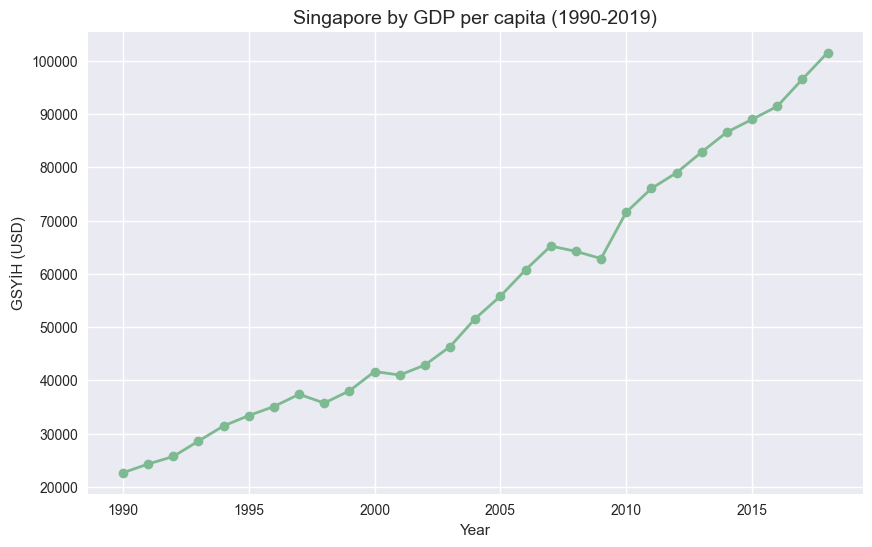

In [42]:
if not sg.empty:


    
    plt.figure(figsize=(10,6))
    plt.plot(sg['year'], sg['gdp_per_capita'], marker='o', linewidth=2)
    plt.title('Singapore by GDP per capita (1990-2019)', fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("GSYİH (USD)")
    plt.grid(True)
    plt.show()

In [43]:
# Extra: The 10 countries with the highest GDP growth 
gdp_diff = (
    df_long.groupby('Country')['gdp_per_capita']
    .agg(['first', 'last'])
    .assign(increase=lambda x: x['last'] - x['first'])
    .sort_values('increase', ascending=False)
    .head(10)
)

print("The 10 countries with the highest GDP growth:")
print(gdp_diff)


The 10 countries with the highest GDP growth:
                            first          last     increase
Country                                                     
macao sar, china      26204.03320  123892.16640  97688.13320
luxembourg            29664.79513  113337.42050  83672.62537
singapore             22655.11867  101531.63020  78876.51153
ireland               13738.26598   83203.39468  69465.12870
hong kong sar, china  17504.35720   64596.56385  47092.20665
norway                18432.49795   65510.58527  47078.08732
qatar                 86169.39432  126898.42590  40729.03158
switzerland           27594.63205   68060.94105  40466.30900
united states         23888.60001   62794.58565  38905.98564
north america         23518.27160   61303.19065  37784.91905


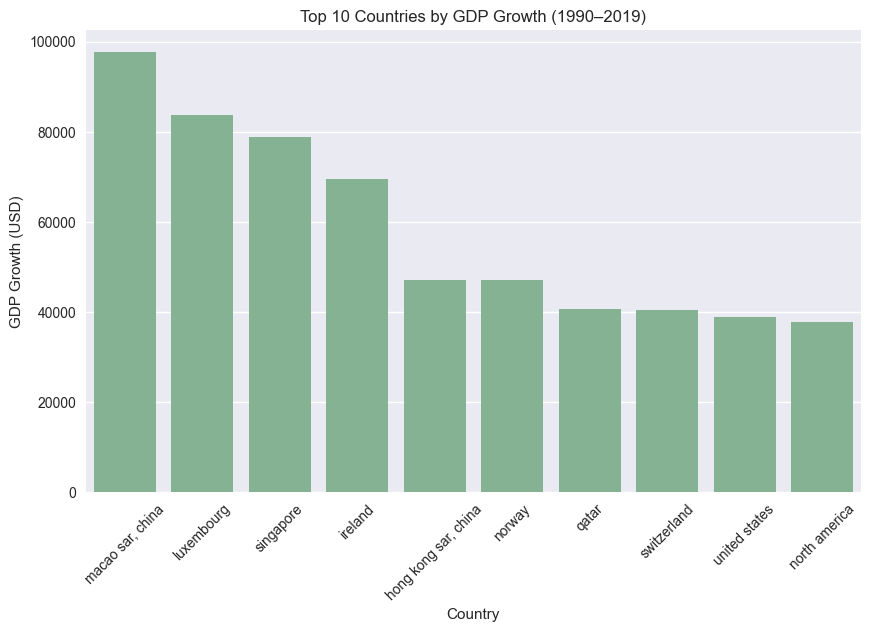

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=gdp_diff.index, y=gdp_diff['increase'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by GDP Growth (1990–2019)")
plt.xlabel("Country")
plt.ylabel("GDP Growth (USD)")
plt.show()

In [45]:
# A simple forecast model based on Singapore only
# Year GDP per capita relationship
if not sg.empty:
    X = sg[['year']]
    y = sg['gdp_per_capita']

    # data split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # create model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # do predict
    y_pred = model.predict(X_test)

    # Performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.4f}")
    

MAE: 3907.83
MSE: 21121120.31
R²: 0.9585


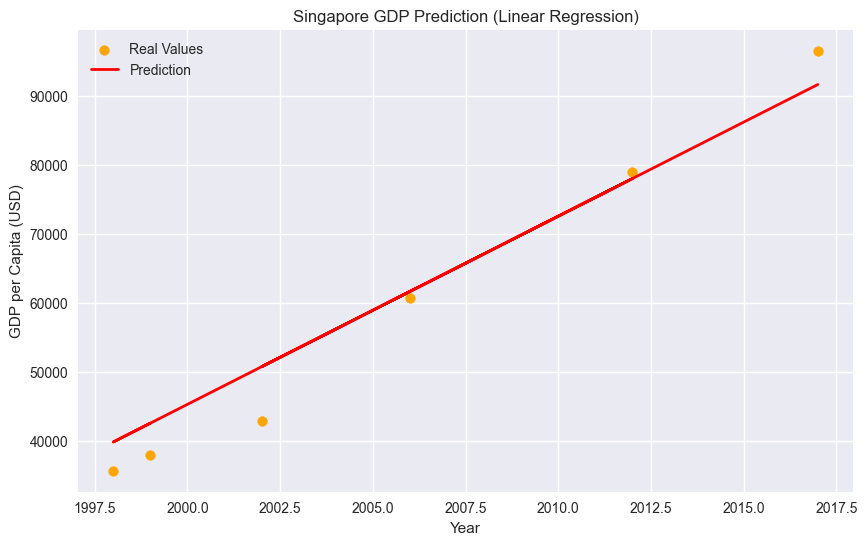

In [46]:
# Real vs Prediction comparison (Gerçek vs Tahmin karşılaştırması)
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='orange', label='Real Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Singapore GDP Prediction (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
    # predict for 2020-2025
future_years = pd.DataFrame({'year': np.arange(2020, 2026)})
future_preds = model.predict(future_years)
print("\n 2020-2025 GDP Predict (USD): ")
for y_, p in zip(future_years['year'], future_preds):
    print(f"{y_}: {p:,.2f}")
else:
    print("The model could not be built because the data for 'Singapore' was not found.")
        



 2020-2025 GDP Predict (USD): 
2020: 99,833.91
2021: 102,558.19
2022: 105,282.47
2023: 108,006.75
2024: 110,731.03
2025: 113,455.31
The model could not be built because the data for 'Singapore' was not found.
